# 회귀분석 - 범주형 변수를 포함한 예

In [1]:
import pandas as pd

df_co2_data = pd.read_csv("co2.csv")

In [2]:
df_co2_data

,year,month,month_a,average,trend
0,1980,1,Jan,338.55,337.93
1,1980,2,Feb,339.27,338.22
2,1980,3,Mar,339.60,338.25
3,1980,4,Apr,339.99,338.37
4,1980,5,May,340.43,338.90
...,...,...,...,...,...
499,2021,8,Aug,412.17,415.00
500,2021,9,Sep,412.39,415.24
501,2021,10,Oct,413.83,415.41
502,2021,11,Nov,415.60,415.86


In [3]:
df_co2_data["time"] = df_co2_data["year"] + (df_co2_data["month"] - 0.5) / 12

df_co2_data

,year,month,month_a,average,trend,time
0,1980,1,Jan,338.55,337.93,1980.041667
1,1980,2,Feb,339.27,338.22,1980.125000
2,1980,3,Mar,339.60,338.25,1980.208333
3,1980,4,Apr,339.99,338.37,1980.291667
4,1980,5,May,340.43,338.90,1980.375000
...,...,...,...,...,...,...
499,2021,8,Aug,412.17,415.00,2021.625000
500,2021,9,Sep,412.39,415.24,2021.708333
501,2021,10,Oct,413.83,415.41,2021.791667
502,2021,11,Nov,415.60,415.86,2021.875000


/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'CO2 (ppm)')

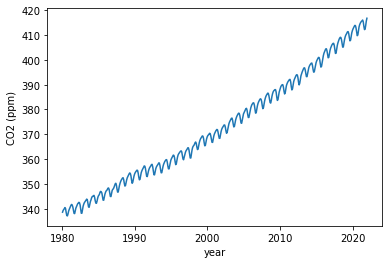

In [4]:
import matplotlib.pyplot as plt

plt.plot(df_co2_data["time"], df_co2_data["average"])
plt.xlabel("year")
plt.ylabel("CO2 (ppm)")

Text(0, 0.5, 'CO2 (ppm)')

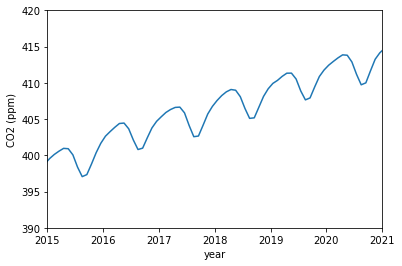

In [5]:
plt.plot(df_co2_data["time"], df_co2_data["average"])
plt.xlim(2015, 2021)
plt.ylim(390, 420)
plt.xlabel("year")
plt.ylabel("CO2 (ppm)")

In [6]:
import statsmodels.formula.api as sm

model1 = sm.ols(formula='average~time', data=df_co2_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                average   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.421e+04
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:10:34   Log-Likelihood:                -1214.2
No. Observations:                 504   AIC:                             2432.
Df Residuals:                     502   BIC:                             2441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3294.9204     19.829   -166.170      0.000   -3333.878   -3255.963
time           1.8328      0.010    184.962      0.000       1.813       1.852
==============================================================================
Omnibus:                       16.184   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.825
Skew:                           0.125   Prob(JB):                       0.0121
Kurtosis:                       2.402   Cond. No.                     3.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
df_co2_data["model1_pred"] = model1.predict(df_co2_data)

/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'CO2 (ppm)')

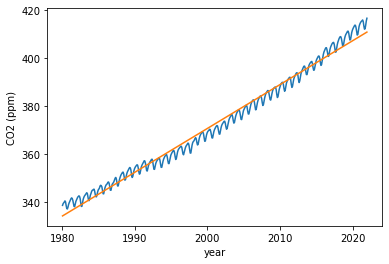

In [8]:
plt.plot(df_co2_data["time"], df_co2_data["average"])
plt.plot(df_co2_data["time"], df_co2_data["model1_pred"])
plt.xlabel("year")
plt.ylabel("CO2 (ppm)")

In [9]:
df_co2_data

,year,month,month_a,average,trend,time,model1_pred
0,1980,1,Jan,338.55,337.93,1980.041667,334.142199
1,1980,2,Feb,339.27,338.22,1980.125000,334.294934
2,1980,3,Mar,339.60,338.25,1980.208333,334.447669
3,1980,4,Apr,339.99,338.37,1980.291667,334.600404
4,1980,5,May,340.43,338.90,1980.375000,334.753140
...,...,...,...,...,...,...,...
499,2021,8,Aug,412.17,415.00,2021.625000,410.357019
500,2021,9,Sep,412.39,415.24,2021.708333,410.509754
501,2021,10,Oct,413.83,415.41,2021.791667,410.662489
502,2021,11,Nov,415.60,415.86,2021.875000,410.815224


In [10]:
df_co2_data.groupby('year', as_index=False).mean()

,year,month,average,trend,time,model1_pred
0,1980,6.5,338.910000,338.910833,1980.5,334.982242
1,1981,6.5,340.110833,340.110000,1981.5,336.815064
2,1982,6.5,340.856667,340.855000,1982.5,338.647885
3,1983,6.5,342.530000,342.532500,1983.5,340.480706
4,1984,6.5,344.074167,344.073333,1984.5,342.313528
5,1985,6.5,345.543333,345.544167,1985.5,344.146349
6,1986,6.5,346.964167,346.964167,1986.5,345.979170
7,1987,6.5,348.675000,348.675000,1987.5,347.811991
8,1988,6.5,351.158333,351.158333,1988.5,349.644813
9,1989,6.5,352.781667,352.780000,1989.5,351.477634


/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'CO2 (ppm)')

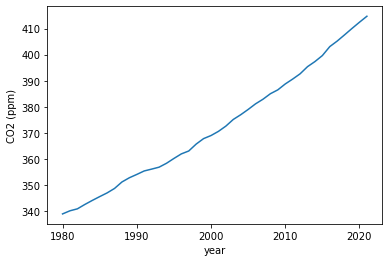

In [11]:
# https://ponyozzang.tistory.com/291
df_co2_mean = df_co2_data.groupby('year', as_index=False).mean()
df_co2_mean
plt.plot(df_co2_mean["year"], df_co2_mean["average"])
plt.xlabel("year")
plt.ylabel("CO2 (ppm)")

In [12]:
df_co2_mean


,year,month,average,trend,time,model1_pred
0,1980,6.5,338.910000,338.910833,1980.5,334.982242
1,1981,6.5,340.110833,340.110000,1981.5,336.815064
2,1982,6.5,340.856667,340.855000,1982.5,338.647885
3,1983,6.5,342.530000,342.532500,1983.5,340.480706
4,1984,6.5,344.074167,344.073333,1984.5,342.313528
5,1985,6.5,345.543333,345.544167,1985.5,344.146349
6,1986,6.5,346.964167,346.964167,1986.5,345.979170
7,1987,6.5,348.675000,348.675000,1987.5,347.811991
8,1988,6.5,351.158333,351.158333,1988.5,349.644813
9,1989,6.5,352.781667,352.780000,1989.5,351.477634


In [13]:
504 / 12

42.0

In [14]:
# https://m.blog.naver.com/liberty264/221124976436
import statsmodels.formula.api as sm

mean_model = sm.ols(formula='average~year', data=df_co2_mean).fit()

In [15]:
print(mean_model.params)

Intercept   -3297.549209
year            1.834593
dtype: float64


$$ CO_2 = -3298 + 1.835 \times year $$

In [16]:
mean_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                average   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     4062.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):           7.63e-42
Time:                        14:10:37   Log-Likelihood:                -92.840
No. Observations:                  42   AIC:                             189.7
Df Residuals:                      40   BIC:                             193.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3297.5492     57.589    -57.260      0.000   -3413.941   -3181.158
year           1.8346      0.029     63.731      0.000       1.776       1.893
==============================================================================
Omnibus:                        6.774   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                3.285
Skew:                           0.436   Prob(JB):                        0.194
Kurtosis:                       1.943   Cond. No.                     3.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
df_co2_mean["pred"] = mean_model.predict(df_co2_mean)

In [18]:
df_co2_mean

,year,month,average,trend,time,model1_pred,pred
0,1980,6.5,338.910000,338.910833,1980.5,334.982242,334.945913
1,1981,6.5,340.110833,340.110000,1981.5,336.815064,336.780506
2,1982,6.5,340.856667,340.855000,1982.5,338.647885,338.615100
3,1983,6.5,342.530000,342.532500,1983.5,340.480706,340.449693
4,1984,6.5,344.074167,344.073333,1984.5,342.313528,342.284287
5,1985,6.5,345.543333,345.544167,1985.5,344.146349,344.118880
6,1986,6.5,346.964167,346.964167,1986.5,345.979170,345.953474
7,1987,6.5,348.675000,348.675000,1987.5,347.811991,347.788067
8,1988,6.5,351.158333,351.158333,1988.5,349.644813,349.622661
9,1989,6.5,352.781667,352.780000,1989.5,351.477634,351.457254


/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'CO2 (ppm)')

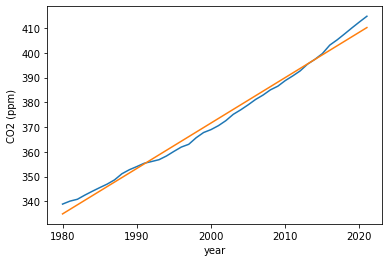

In [19]:
plt.plot(df_co2_mean["year"], df_co2_mean["average"])
plt.plot(df_co2_mean["year"], df_co2_mean["pred"])
plt.xlabel("year")
plt.ylabel("CO2 (ppm)")

In [20]:
df_co2_data

,year,month,month_a,average,trend,time,model1_pred
0,1980,1,Jan,338.55,337.93,1980.041667,334.142199
1,1980,2,Feb,339.27,338.22,1980.125000,334.294934
2,1980,3,Mar,339.60,338.25,1980.208333,334.447669
3,1980,4,Apr,339.99,338.37,1980.291667,334.600404
4,1980,5,May,340.43,338.90,1980.375000,334.753140
...,...,...,...,...,...,...,...
499,2021,8,Aug,412.17,415.00,2021.625000,410.357019
500,2021,9,Sep,412.39,415.24,2021.708333,410.509754
501,2021,10,Oct,413.83,415.41,2021.791667,410.662489
502,2021,11,Nov,415.60,415.86,2021.875000,410.815224


In [21]:
whole_model_a = sm.ols(formula='average~year+month_a', data=df_co2_data).fit()

In [22]:
whole_model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                average   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     4114.
Date:                Mon, 18 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:10:39   Log-Likelihood:                -1117.4
No. Observations:                 504   AIC:                             2261.
Df Residuals:                     491   BIC:                             2316.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3296.1886     16.548   -199.185      0.000   -3328.703   -3263.674
month_a[T.Aug]    -3.7076      0.491     -7.550      0.000      -4.673      -2.743
month_a[T.Dec]    -0.0569      0.491     -0.116      0.908      -1.022       0.908
month_a[T.Feb]    -0.8236      0.491     -1.677      0.094      -1.788       0.141
month_a[T.Jan]    -1.3086      0.491     -2.665      0.008      -2.273      -0.344
month_a[T.Jul]    -2.4067      0.491     -4.901      0.000      -3.372      -1.442
month_a[T.Jun]    -0.8148      0.491     -1.659      0.098      -1.780       0.150
month_a[T.Mar]    -0.3929      0.491     -0.800      0.424      -1.358       0.572
month_a[T.May]     0.0124      0.491      0.025      0.980      -0.953       0.977
month_a[T.Nov]    -0.9410      0.491     -1.916      0.056      -1.906       0.024
month_a[T.Oct]    -2.2857      0.491     -4.654      0.000      -3.251      -1.321
month_a[T.Sep]    -3.6024      0.491     -7.335      0.000      -4.567      -2.637
year               1.8346      0.008    221.829      0.000       1.818       1.851
==============================================================================
Omnibus:                      128.851   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.695
Skew:                           0.432   Prob(JB):                     6.52e-09
Kurtosis:                       1.976   Cond. No.                     3.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$ CO_2 = -3296 + 1.8346 \times year - 1.3086 \times [Jan] -0.8236 \times [Feb] \cdots $$

In [23]:
df_co2_data["pred"] = whole_model_a.predict(df_co2_data)

/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'CO2 (ppm)')

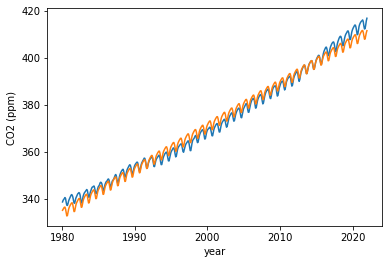

In [24]:
plt.plot(df_co2_data["time"], df_co2_data["average"])
plt.plot(df_co2_data["time"], df_co2_data["pred"])
plt.xlabel("year")
plt.ylabel("CO2 (ppm)")

In [26]:
df_co2_data

,year,month,month_a,average,trend,time,model1_pred,pred,year_mean_pred
0,1980,1,Jan,338.55,337.93,1980.041667,334.142199,334.997976,334.945913
1,1980,2,Feb,339.27,338.22,1980.125000,334.294934,335.482976,334.945913
2,1980,3,Mar,339.60,338.25,1980.208333,334.447669,335.913690,334.945913
3,1980,4,Apr,339.99,338.37,1980.291667,334.600404,336.306548,334.945913
4,1980,5,May,340.43,338.90,1980.375000,334.753140,336.318929,334.945913
...,...,...,...,...,...,...,...,...,...
499,2021,8,Aug,412.17,415.00,2021.625000,410.357019,407.817262,410.164246
500,2021,9,Sep,412.39,415.24,2021.708333,410.509754,407.922500,410.164246
501,2021,10,Oct,413.83,415.41,2021.791667,410.662489,409.239167,410.164246
502,2021,11,Nov,415.60,415.86,2021.875000,410.815224,410.583929,410.164246


/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/jiheo/opt/anaconda3/envs/practice/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'CO2 (ppm)')

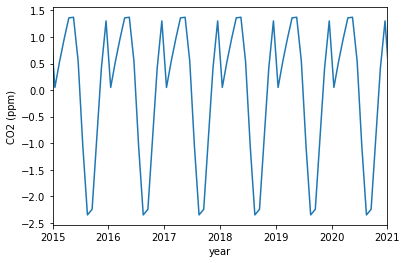

In [25]:
df_co2_data["year_mean_pred"] = mean_model.predict(df_co2_data)

plt.plot(df_co2_data["time"], df_co2_data["pred"] - df_co2_data["year_mean_pred"])
plt.xlim(2015, 2021)
plt.xlabel("year")
plt.ylabel("CO2 (ppm)")

## 숙제 

1. 위에서 진행한 내용을 이번에는 2차식으로 회귀분석을 하여 그 결과를 정리하라.
2. 각 달이 아니고 4계절별로 회귀분석하는 과정을 수행하고 그 결과를 정리하라.